In [2]:
sc

In [2]:
csv = '/Users/ltsai/Downloads/titanic3.csv'

[DataSet Information](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)

In [6]:
open(csv, 'r').readlines()[:10]

['"pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest"\n',
 '1,1,"Allen, Miss. Elisabeth Walton","female",29,0,0,"24160",211.3375,"B5","S","2",,"St Louis, MO"\n',
 '1,1,"Allison, Master. Hudson Trevor","male",0.92,1,2,"113781",151.5500,"C22 C26","S","11",,"Montreal, PQ / Chesterville, ON"\n',
 '1,0,"Allison, Miss. Helen Loraine","female",2,1,2,"113781",151.5500,"C22 C26","S",,,"Montreal, PQ / Chesterville, ON"\n',
 '1,0,"Allison, Mr. Hudson Joshua Creighton","male",30,1,2,"113781",151.5500,"C22 C26","S",,"135","Montreal, PQ / Chesterville, ON"\n',
 '1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","female",25,1,2,"113781",151.5500,"C22 C26","S",,,"Montreal, PQ / Chesterville, ON"\n',
 '1,1,"Anderson, Mr. Harry","male",48,0,0,"19952",26.5500,"E12","S","3",,"New York, NY"\n',
 '1,1,"Andrews, Miss. Kornelia Theodosia","female",63,1,0,"13502",77.9583,"D7","S","10",,"Hudson, NY"\n',
 '1,0,"Andrews, Mr. Thomas Jr","male",39,

In [3]:
from pyspark.sql.types import *
customSchema = StructType([StructField('pclass', StringType(), True),
                           StructField('survived', IntegerType(), True),
                           StructField('name', StringType(), True),
                           StructField('sex', StringType(), True),
                           StructField('age', StringType(), True),
                           StructField('sibsp', IntegerType(), True),
                           StructField('parch', IntegerType(), True),
                           StructField('ticket', StringType(), True),
                           StructField('fare', FloatType(), True),
                           StructField('cabin', StringType(), True),
                           StructField('embarked', StringType(), True),
                           StructField('boat', StringType(), True),
                           StructField('body', StringType(), True),
                           StructField('home.dest', StringType(), True)])
df = sqlContext.read.format('com.databricks.spark.csv'). \
        options(header='true', treatEmptyValuesAsNulls='true'). \
        load(csv, schema = customSchema).cache() 
df.count()

1309

In [72]:
df.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: float (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [4]:
df.registerTempTable("passengers")

In [76]:
qlContext.sql("select mean(age)from passengers").collect()

[Row(_c0=29.851837320574163)]

In [72]:
survival = sqlContext.sql("select sex, count(survived) as cnt from passengers where survived=1 group by sex").toPandas()

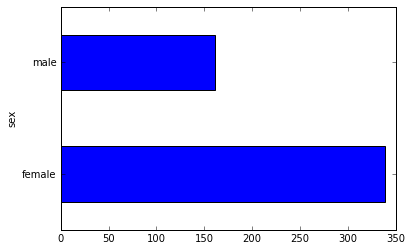

In [73]:
%matplotlib inline
survival.plot(kind='barh', x='sex', y='cnt', legend=False)

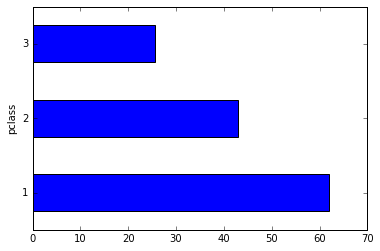

In [127]:
survival = sqlContext.sql(
    "select pclass, 100*(SUM(CASE WHEN survived = 1 THEN 1 ELSE 0 END)/count(*)) survival_rate \
     from passengers \
     group by pclass").toPandas()
survival.plot(kind='barh', x='pclass', y='survival_rate', legend=False)